# Nonlinear Classification
Under construction (3 Oct 2018)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
dtype = torch.float
import NeuralNetwork as NN
import Layer
import importlib
import time
from copy import deepcopy
from IPython.display import display
from ipywidgets import FloatProgress

importlib.reload(NN)
importlib.reload(Layer);

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0") # Uncomment this to run on GPU
else:
    device = torch.device("cpu")

## Binary one-hot

In [13]:
# 8->5 binary one-hot
noise = 0.
n_samples = 100
s = np.array([[1,0,1,0,0,1,1,0],
                         [0,1,0,1,0,1,0,1],
                         [0,1,1,0,1,0,0,1],
                         [1,0,0,0,1,0,1,1],
                         [1,0,0,1,0,1,0,1]], dtype=float)
e = np.eye(5)
s = s*2. - 1.
#e = e*2. - 1.
classes = len(s)
training_input = []
training_output = []
r = 0
for n in range(n_samples):
    training_input.append(np.array(s[r], dtype=float) + noise*np.random.normal(scale=0.01,size=len(s[r])))
    training_output.append(np.array(e[r], dtype=float))
    r = np.mod(r+1, classes) #r = np.random.randint(classes)

training_input = torch.tensor(training_input).float().to(device)
training_output = torch.tensor(training_output).float().to(device)
train = [training_input, training_output]

n_test_samples = 100
test_input = []
test_output = []
r = 0
for n in range(n_test_samples):
    test_input.append(np.array(s[r], dtype=float) + noise*np.random.normal(scale=0.01,size=len(s[r])))
    test_output.append(np.array(e[r], dtype=float))
    r = np.mod(r+1, classes) #np.random.randint(classes)

test_input = torch.tensor(test_input).float().to(device)
test_output = torch.tensor(test_output).float().to(device)
test = [test_input, test_output]

n_rand_samples = 10
rand_input = []
rand_output = []
r = 0
for n in range(n_test_samples):
    rand_input.append(np.random.rand(len(s[r])))
    rand_output.append(np.array(e[r], dtype=float))
    r = np.mod(r+1, classes) #np.random.randint(classes)

rand_input = torch.tensor(rand_input).float().to(device)
rand_output = torch.tensor(rand_output).float().to(device)
rand = [rand_input, rand_output]



for x, t in zip(s,e):
    print(str(np.array(x,dtype=int))+' -> '+str(t))

[ 1 -1  1 -1 -1  1  1 -1] -> [1. 0. 0. 0. 0.]
[-1  1 -1  1 -1  1 -1  1] -> [0. 1. 0. 0. 0.]
[-1  1  1 -1  1 -1 -1  1] -> [0. 0. 1. 0. 0.]
[ 1 -1 -1 -1  1 -1  1  1] -> [0. 0. 0. 1. 0.]
[ 1 -1 -1  1 -1  1 -1  1] -> [0. 0. 0. 0. 1.]


In [20]:
rand_input

tensor([[ 0.1297,  0.0687,  0.5727,  0.2408,  0.7897,  0.0575,  0.4017,
          0.2225],
        [ 0.4630,  0.8307,  0.7560,  0.8344,  0.6730,  0.7848,  0.7565,
          0.6031],
        [ 0.0172,  0.8904,  0.4537,  0.7306,  0.4877,  0.7032,  0.2875,
          0.5797],
        [ 0.6168,  0.3560,  0.8856,  0.0699,  0.9765,  0.5857,  0.5256,
          0.4325],
        [ 0.8697,  0.4211,  0.0540,  0.0592,  0.5751,  0.3790,  0.2890,
          0.4161],
        [ 0.3456,  0.5062,  0.6144,  0.5458,  0.6651,  0.5052,  0.8863,
          0.3154],
        [ 0.8693,  0.0144,  0.8416,  0.7145,  0.3437,  0.6773,  0.0133,
          0.1711],
        [ 0.8862,  0.2896,  0.2165,  0.5244,  0.1474,  0.7182,  0.7175,
          0.3526],
        [ 0.9882,  0.1726,  0.5613,  0.9507,  0.7037,  0.5910,  0.3358,
          0.8675],
        [ 0.0232,  0.7638,  0.6825,  0.2982,  0.6172,  0.8474,  0.4510,
          0.0556],
        [ 0.9026,  0.1886,  0.4705,  0.9290,  0.0662,  0.7404,  0.5321,
          0.9720],

In [17]:
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=8))
net.AddLayer(Layer.PELayer(n=7))
net.Connect(0,1)
net.AddLayer(Layer.PELayer(n=6))
net.Connect(1,2)
net.AddLayer(Layer.TopPELayer(n=5))
net.Connect(2,3)
net.SetTau(0.02)

## Binary Mapping

In [7]:
# 8->4 binary mapping
noise = 0.
n_samples = 100
s = np.array([[1,0,1,0,0,1,1,0],
                         [0,1,0,1,0,1,0,1],
                         [0,1,1,0,1,0,0,1],
                         [1,0,0,0,1,0,1,1],
                         [1,0,0,1,0,1,0,1]], dtype=float)
e = np.array([[0,1,1,1],[1,1,0,1],[1,0,1,1],[1,1,1,0],[0,0,0,0]])
s = s*2. - 1.
e = e*2. - 1.
classes = len(s)
training_input = []
training_output = []
r = 0
for n in range(n_samples):
    r = np.mod(r+1, classes) #r = np.random.randint(classes)
    training_input.append(np.array(s[r], dtype=float) + noise*np.random.normal(scale=0.01,size=len(s[r])))
    training_output.append(np.array(e[r], dtype=float))

training_input = torch.tensor(training_input).float().to(device)
training_output = torch.tensor(training_output).float().to(device)
train = [training_input, training_output]

n_test_samples = 100
test_input = []
test_output = []
r = 0
for n in range(n_test_samples):
    r = np.mod(r+1, classes) #np.random.randint(classes)
    test_input.append(np.array(s[r], dtype=float) + noise*np.random.normal(scale=0.01,size=len(s[r])))
    test_output.append(np.array(e[r], dtype=float))

test_input = torch.tensor(test_input).float().to(device)
test_output = torch.tensor(test_output).float().to(device)
test = [test_input, test_output]

for x, t in zip(s,e):
    print(str(np.array(x,dtype=int))+' -> '+str(t))

[ 1 -1  1 -1 -1  1  1 -1] -> [-1.  1.  1.  1.]
[-1  1 -1  1 -1  1 -1  1] -> [ 1.  1. -1.  1.]
[-1  1  1 -1  1 -1 -1  1] -> [ 1. -1.  1.  1.]
[ 1 -1 -1 -1  1 -1  1  1] -> [ 1.  1.  1. -1.]
[ 1 -1 -1  1 -1  1 -1  1] -> [-1. -1. -1. -1.]


In [124]:
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=8))
# net.AddLayer(Layer.PELayer(n=7))
# net.Connect(0, 1)
# net.AddLayer(Layer.PELayer(n=6))
# net.Connect(1,2)
# net.AddLayer(Layer.TopPELayer(n=4))
# net.Connect(2,3)
# net.ConnectNextLayer(Layer.InputPELayer(n=8))
net.ConnectNextLayer(Layer.PELayer(n=7))
net.ConnectNextLayer(Layer.PELayer(n=6))
net.ConnectNextLayer(Layer.TopPELayer(n=4))
net.layers[-1].sigma = Layer.tanh
net.layers[-1].sigma_p = Layer.tanh_p
net.SetTau(0.02)

## Polar Clusters

In [81]:
n_theta = 4
n_rho = 3
s = []
e = []
#for theta in np.linspace(2.*np.pi/(n_theta+2.), 2.*np.pi*(n_theta+1.)/(n_theta+2.), n_theta, endpoint=True):
for theta in np.linspace(-1., 1, n_theta+1, endpoint=False):
    if theta != -1.:
        theta_radians = theta*np.pi
        for rho in np.linspace(0., 1., n_rho+1, endpoint=False):
            if rho != 0.:
                rho2 = rho - 0.5
                e.append([rho2, theta])
                x = rho*np.cos(theta_radians)
                y = rho*np.sin(theta_radians)
                s.append([x,y])
e = np.array(e)
s = np.array(s)
#print(e)
#print(s)

In [82]:
training_samples = 100
r = 0
training_input = []
training_output = []
for n in range(training_samples):
    r = np.mod(r+1, len(s)) #r = np.random.randint(classes)
    training_input.append(np.array(s[r,:], dtype=float) )#+ noise*np.random.normal(scale=0.01,size=len(s[r,:])))
    training_output.append(np.array(e[r,:], dtype=float))

training_input = torch.tensor(training_input).float().to(device)
training_output = torch.tensor(training_output).float().to(device)
train = [training_input, training_output]

n_test_samples = 100
test_input = []
test_output = []
r = 0
for n in range(n_test_samples):
    r = np.mod(r+1, len(s)) #r = np.random.randint(classes)
    test_input.append(np.array(s[r,:], dtype=float) )#+ noise*np.random.normal(scale=0.01,size=len(s[r,:])))
    test_output.append(np.array(e[r,:], dtype=float))

test_input = torch.tensor(test_input).float().to(device)
test_output = torch.tensor(test_output).float().to(device)
test = [test_input, test_output]

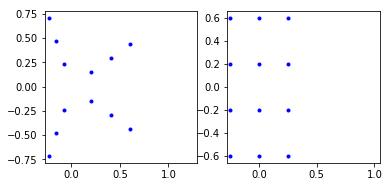

In [83]:
plt.subplot(1,2,1); plt.plot(s[:,0], s[:,1], 'b.'); plt.axis('square');
plt.subplot(1,2,2); plt.plot(e[:,0], e[:,1], 'b.'); plt.axis('square');

In [84]:
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=2)) # 0
net.AddLayer(Layer.PELayer(n=6))      # 1
net.AddLayer(Layer.PELayer(n=8))      # 2
net.AddLayer(Layer.TopPELayer(n=10))  # 3 (augmented)
net.AddLayer(Layer.TopPELayer(n=2))   # 4
net.Connect(0,1)
net.Connect(1,2)
net.Connect(2,3)
net.Connect(2,4)
net.layers[3].sigma = Layer.tanh
net.layers[3].sigma_p = Layer.tanh_p
net.layers[3].SetFF()  # Augmenting layers have no upper input
net.layers[4].sigma = Layer.tanh
net.layers[4].sigma_p = Layer.tanh_p
net.SetTau(0.02)

In [118]:
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=2)) # 0
net.AddLayer(Layer.PELayer(n=50))     # 3
net.AddLayer(Layer.TopPELayer(n=2))   # 4
net.Connect(0,1)
net.Connect(1,2)
net.layers[-1].sigma = Layer.tanh
net.layers[-1].sigma_p = Layer.tanh_p
net.SetTau(0.02)

## Train

In [18]:
train_shuffle = list(zip(train[0],train[1]))
batch_size = 10
net.learning_tau = torch.tensor(batch_size).float().to(device)
epochs = 8
fp = FloatProgress(min=0,max=epochs*len(train_shuffle))
display(fp)
T = 3.
start_time = time.time()
for k in range(epochs):
    np.random.shuffle(train_shuffle)
    unzip = list(zip(*train_shuffle))
    batches = NN.MakeBatches(unzip[0], unzip[1], batch_size)
    for x in batches:
        net.Reset()
        net.Infer(T, x[0], x[1])
        fp.value += batch_size
end_time = time.time()
print('Total time: '+str(end_time-start_time))

A Jupyter Widget

Total time: 11.584635972976685


In [19]:
net.Save('bin8-5.npy')

In [14]:
net = NN.NeuralNetwork()
net.Load('bin8-5.npy')

## Test

### Run the model on the test dataset

In [14]:
net.Reset()
yy = net.Predict(10., train[0])
y_true = train[1]

In [15]:
print(np.round(yy[:10],decimals=3))
print(y_true[:10])

tensor([[ 0.9590,  0.0070,  0.0090,  0.0140,  0.0110],
        [ 0.0070,  0.9540,  0.0150,  0.0060,  0.0180],
        [ 0.0090,  0.0130,  0.9590,  0.0130,  0.0060],
        [ 0.0140,  0.0070,  0.0130,  0.9570,  0.0100],
        [ 0.0120,  0.0230,  0.0050,  0.0100,  0.9500],
        [ 0.9590,  0.0070,  0.0090,  0.0140,  0.0110],
        [ 0.0070,  0.9540,  0.0150,  0.0060,  0.0180],
        [ 0.0090,  0.0130,  0.9590,  0.0130,  0.0060],
        [ 0.0140,  0.0070,  0.0130,  0.9570,  0.0100],
        [ 0.0120,  0.0230,  0.0050,  0.0100,  0.9500]])
tensor([[ 1.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  1.],
        [ 1.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  1.]])


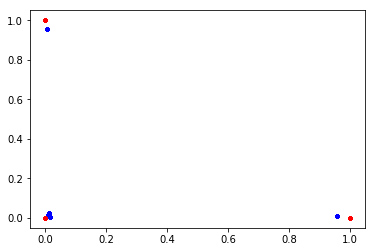

In [16]:
plt.plot(np.array(yy[:,0]), np.array(yy[:,1]),'b.', np.array(y_true[:,0]), np.array(y_true[:,1]),'r.')

In [20]:
net.Reset()
yy = net.Generate(10., test[1])
y_true = test[0]

In [21]:
idx = 7
print(test[1][idx])
print(yy[idx])
print(y_true[idx])

tensor([ 0.,  0.,  1.,  0.,  0.])
tensor([-1.0694,  1.0690,  0.9980, -0.9760,  1.1230, -1.1234, -1.0366,
         1.0200])
tensor([-1.,  1.,  1., -1.,  1., -1., -1.,  1.])


In [21]:
net.Reset()
yy = net.Predict(10., rand[0])
print(yy)

tensor([[ 0.0731,  0.0255,  0.1281,  0.7320,  0.0413],
        [ 0.0930,  0.0655,  0.1397,  0.6663,  0.0354],
        [ 0.0738,  0.1540,  0.7594,  0.0093,  0.0035],
        [ 0.1176,  0.0130,  0.1431,  0.7110,  0.0153],
        [ 0.0778,  0.0362,  0.1060,  0.7504,  0.0296],
        [ 0.2225,  0.0267,  0.0780,  0.6637,  0.0091],
        [ 0.7609,  0.0103,  0.0708,  0.0543,  0.1038],
        [ 0.7558,  0.0114,  0.0109,  0.1828,  0.0391],
        [ 0.0866,  0.0272,  0.0732,  0.7665,  0.0464],
        [ 0.1820,  0.0777,  0.7241,  0.0110,  0.0053],
        [ 0.1225,  0.0244,  0.0161,  0.0208,  0.8163],
        [ 0.0948,  0.0390,  0.1569,  0.6444,  0.0650],
        [ 0.0747,  0.0553,  0.0829,  0.7534,  0.0337],
        [ 0.0867,  0.0400,  0.1195,  0.7042,  0.0496],
        [ 0.1035,  0.0851,  0.7673,  0.0311,  0.0130],
        [ 0.7433,  0.0139,  0.0334,  0.1411,  0.0682],
        [ 0.2185,  0.0341,  0.0984,  0.6277,  0.0212],
        [ 0.0928,  0.1075,  0.7412,  0.0433,  0.0153],
        [ 

In [26]:
fooled_count = 0
max_confidence = 0.
total_confidence = 0.
for yyy in yy:
    est_class = np.argmax(yyy)
    confidence = yyy[est_class]
    if confidence>max_confidence:
        max_confidence = confidence
        #max_confidence_idx = idx
        #max_confidence_class = est_class
        #best_fooler = random_x
        #print(str(max_confidence_class))
    if confidence>0.95:
        fooled_count += 1
        #print(str(np.round(random_x,3))+' '+str(s[est_class])+' '+str(np.round(sm,3)))
        
    total_confidence += yyy[est_class]
    
print('Fooled ' + str(float(fooled_count*100.)/len(rand)) + '%')
print('Max Confidence   ' + str(max_confidence))
print('Average Confidence ' + str(total_confidence/len(rand)))

Fooled 0.0%
Max Confidence   tensor(0.8403)
Average Confidence tensor(36.9585)


In [271]:
# Test for binary strings dataset
fail = 0
for x,t in zip(yy, y_true):
    if np.isnan(t).any() or torch.min(x*t).le(0.):
        fail += 1
n_trials = float(len(y_true))
print('Accuracy '+str((n_trials-fail)/n_trials*100.)+'%')

Accuracy 0.0%


In [273]:
# Test for polar clusters dataset
fail = 0
for x,t in zip(yy, y_true):
    if np.isnan(t).any() or torch.max(abs(x-t)).ge(0.2):
        fail += 1
n_trials = float(len(test[0]))
print('Accuracy '+str((n_trials-fail)/n_trials))

Accuracy 1.0


In [58]:
idx = np.random.randint(len(test[0]))
net.Reset()
print(net.Predict(5., test[0][idx]))
print(test[1][idx])

tensor([ 0.1699,  0.1597,  0.1946,  0.3365,  0.1393])
tensor([ 0.,  1.,  0.,  0.,  0.])


In [56]:
net2 = NN.NeuralNetwork()
net2.Load('blah.npy')

In [406]:
np.shape(net2.W[1])

torch.Size([6, 7])

In [59]:
net2.Reset()
print(net2.Predict(5., test[0][idx]))
print(test[1][idx])

tensor([nan., nan., nan., nan., nan.])
tensor([ 0.,  1.,  0.,  0.,  0.])


In [250]:
print(np.shape(net2.layers[1].dvdt))
print(np.shape(net2.W[0]))
print(np.shape(net2.layers[0].e))
print(np.shape(net2.M[0]))
print(np.shape(net2.layers[1].v))

torch.Size([7])
torch.Size([7, 8])
torch.Size([8])
torch.Size([8, 7])
torch.Size([7])


In [251]:
print(np.shape(net.layers[1].dvdt))
print(np.shape(net.W[0]))
print(np.shape(net.layers[0].e))
print(np.shape(net.M[0]))
print(np.shape(net.layers[1].v))

torch.Size([7])
torch.Size([7, 8])
torch.Size([8])
torch.Size([8, 7])
torch.Size([7])


In [664]:
idx = np.random.randint(len(test[1]))
xx = net.Generate(10., test[1][idx])
print(xx)
print(test[0][idx])

tensor([ 0.5916, -0.5986, -0.8456, -0.7550,  0.8802, -0.8882,  0.5235,
         1.1115])
tensor([ 1., -1., -1., -1.,  1., -1.,  1.,  1.])


In [663]:
idx = 2
print(np.round(x_true[idx:idx+5],0)-np.round(x_est[idx:idx+5],0))

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]


In [39]:
idx = 58
print(train[1][idx])
net.Predict(10., train[0][idx])

[-1. -1. -1. -1.]


tensor([ 0.9986,  0.9992, -0.9991,  0.9972], device='cuda:0')